<a href="https://colab.research.google.com/github/nesrine-ach/British-Airways-Data-Science/blob/main/BA_theforage_Task1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task1: Web scraping to gain company insights

### Creating the data file

In [1]:
pip install gensim --user

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
pip install gensim --user

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
pip install WordCloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

import gensim
from gensim import corpora

from textblob import TextBlob

import matplotlib.pyplot as plt
from wordcloud import WordCloud
import seaborn as sns
from collections import Counter

In [5]:
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [6]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 15
page_size = 100

reviews = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())
    
    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews
Scraping page 11
   ---> 1100 total reviews
Scraping page 12
   ---> 1200 total reviews
Scraping page 13
   ---> 1300 total reviews
Scraping page 14
   ---> 1400 total reviews
Scraping page 15
   ---> 1500 total reviews


In [7]:
df = pd.DataFrame()
df["reviews"] = reviews
df.head()

,reviews
0,✅ Trip Verified | Although it was a bit uncom...
1,✅ Trip Verified | Boarding was decently organ...
2,✅ Trip Verified | Boarding on time and departu...
3,✅ Trip Verified | My original flight was canc...
4,✅ Trip Verified | Delayed just for a change. ...


In [8]:
print(df['reviews'])

0       ✅ Trip Verified |  Although it was a bit uncom...
1       ✅ Trip Verified |  Boarding was decently organ...
2       ✅ Trip Verified | Boarding on time and departu...
3       ✅ Trip Verified |  My original flight was canc...
4       ✅ Trip Verified |  Delayed just for a change. ...
                              ...                        
1495    ✅ Verified Review |  Stavanger to Las Vegas vi...
1496    ✅ Verified Review |  Flew with British Airways...
1497    ✅ Verified Review |  Copenhagen to Mexico City...
1498    ✅ Verified Review |  Gatwick to Rome return. O...
1499    ✅ Verified Review |  Prague to London Heathrow...
Name: reviews, Length: 1500, dtype: object


In [9]:
df.to_csv("C:/Users/poste/Downloads/data/BA_reviews.csv")

### Preprocessing the text data

In [10]:
# Clean and preprocess the text data
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

In [11]:
print(stop_words)

{'who', 'weren', 'our', "you'd", 'once', 'they', 'because', 've', 'himself', 'wouldn', 'at', 'has', 'shan', "it's", 'above', 'out', 'll', "hasn't", 'then', 'my', 'am', 'with', 'such', "should've", 'any', 'other', 'doesn', 'as', 'against', 'd', 'hasn', 'below', 'that', 'hadn', 'nor', 'me', 'had', 'this', 'theirs', 'from', 'how', 'o', 'by', 'couldn', "needn't", 'ma', 'didn', 'was', 'there', 'than', 'under', 'some', 'hers', 'shouldn', 'doing', 'after', 'again', 'down', 'here', 'in', 'which', 'itself', 'he', "won't", 'its', "you've", 't', 'aren', 'so', "wouldn't", 'been', 'do', 'very', 'while', "don't", 'if', 'into', 'ain', "hadn't", 'needn', 'wasn', 'their', "that'll", 'about', 'it', 'yours', 'now', 'all', "she's", 'and', 'were', 'up', 'over', 'your', 'herself', 'through', 'own', "couldn't", 'her', 'for', "weren't", 'off', 'y', 'being', 'mustn', "didn't", 'just', 'but', 'only', 'or', 'on', 'when', 'yourselves', 'ours', "mightn't", 'should', 'before', 'each', 'i', 'are', 'them', "mustn't",

In [12]:
def clean_text(text):
    # Remove punctuation and numbers
    text = text.replace('[^a-zA-Z]', ' ')
    # Convert to lowercase
    text = text.lower()
    # Replace specific words with a space
    text = text.replace('✅ trip verified | ', ' ')
    text = text.replace('not verified |', ' ')
    text = text.replace('✅ verified review |', ' ')
    text = text.replace('-', ' ')
    # Remove stopwords
    words = text.split()
    words = [word for word in words if not word in stop_words]
    # Lemmatize words
    words = [lemmatizer.lemmatize(word) for word in words]
    text = ' '.join(words)

    return text

In [13]:
df['clean_text'] = df['reviews'].apply(clean_text)

In [14]:
print(df['clean_text'])

0       although bit uncomfortable flight economy, fli...
1       boarding decently organised. a380 still rather...
2       boarding time departure time flight london hea...
3       original flight cancelled 2 week actual flight...
4       delayed change. poor communication. british ai...
                              ...                        
1495    stavanger la vega via london heathrow. salute ...
1496    flew british airway london heathrow moscow ret...
1497    copenhagen mexico city via london heathrow. up...
1498    gatwick rome return. outward flight plane full...
1499    prague london heathrow. british airway lost pl...
Name: clean_text, Length: 1500, dtype: object


In [15]:
print(df[['clean_text']].head())

                                          clean_text
0  although bit uncomfortable flight economy, fli...
1  boarding decently organised. a380 still rather...
2  boarding time departure time flight london hea...
3  original flight cancelled 2 week actual flight...
4  delayed change. poor communication. british ai...


### Performing topic modeling

In [16]:
# Create dictionary and corpus
dictionary = corpora.Dictionary(df['clean_text'].apply(lambda x: x.split()))
corpus = [dictionary.doc2bow(text.split()) for text in df['clean_text']]

# Train LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus, id2word=dictionary, num_topics=10, passes=10)

# Print top words for each topic
topics = lda_model.print_topics(num_words=10)
for topic in topics:
    print(topic)

(0, '0.008*"crew" + 0.008*"flight" + 0.007*"ba" + 0.007*"cabin" + 0.007*"seat" + 0.006*"one" + 0.006*"service" + 0.005*"business" + 0.005*"class" + 0.005*"good"')
(1, '0.020*"flight" + 0.013*"seat" + 0.010*"food" + 0.010*"ba" + 0.009*"crew" + 0.009*"class" + 0.009*"business" + 0.008*"cabin" + 0.008*"service" + 0.007*"london"')
(2, '0.017*"flight" + 0.017*"ba" + 0.010*"seat" + 0.008*"food" + 0.007*"london" + 0.007*"service" + 0.006*"economy" + 0.005*"premium" + 0.005*"check" + 0.004*"get"')
(3, '0.023*"flight" + 0.009*"ba" + 0.009*"hour" + 0.008*"british" + 0.008*"u" + 0.007*"told" + 0.007*"customer" + 0.007*"london" + 0.007*"would" + 0.006*"airway"')
(4, '0.017*"flight" + 0.010*"ba" + 0.007*"british" + 0.007*"seat" + 0.007*"service" + 0.006*"airway" + 0.006*"get" + 0.005*"airline" + 0.005*"would" + 0.004*"london"')
(5, '0.008*"ba" + 0.008*"flight" + 0.005*"hour" + 0.005*"crew" + 0.004*"london" + 0.004*"baggage" + 0.004*"bag" + 0.004*"staff" + 0.003*"arrived" + 0.003*"went"')
(6, '0.014

### Performing sentiment analysis

In [17]:
# Perform sentiment analysis on each review
df['polarity'] = df['clean_text'].apply(lambda x: TextBlob(x).sentiment.polarity)
df['sentiment'] = df['polarity'].apply(lambda x: 'positive' if x > 0 else 'negative' if x < 0 else 'neutral')

In [18]:
print(df[['clean_text','polarity','sentiment']])

                                             clean_text  polarity sentiment
0     although bit uncomfortable flight economy, fli...  0.257143  positive
1     boarding decently organised. a380 still rather...  0.211275  positive
2     boarding time departure time flight london hea...  0.132143  positive
3     original flight cancelled 2 week actual flight...  0.193750  positive
4     delayed change. poor communication. british ai... -0.057292  negative
...                                                 ...       ...       ...
1495  stavanger la vega via london heathrow. salute ...  0.173152  positive
1496  flew british airway london heathrow moscow ret... -0.081042  negative
1497  copenhagen mexico city via london heathrow. up...  0.057280  positive
1498  gatwick rome return. outward flight plane full...  0.038958  positive
1499  prague london heathrow. british airway lost pl...  0.042386  positive

[1500 rows x 3 columns]


In [19]:
print(df[['clean_text','polarity','sentiment']].head())

                                          clean_text  polarity sentiment
0  although bit uncomfortable flight economy, fli...  0.257143  positive
1  boarding decently organised. a380 still rather...  0.211275  positive
2  boarding time departure time flight london hea...  0.132143  positive
3  original flight cancelled 2 week actual flight...  0.193750  positive
4  delayed change. poor communication. british ai... -0.057292  negative


### Visualizing the results

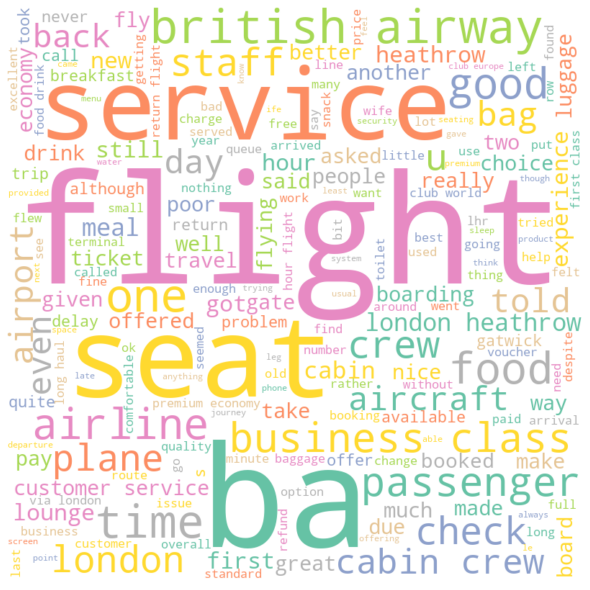

In [20]:
# Create word cloud of most common words in reviews
wordcloud = WordCloud(width=800, height=800, background_color='white', min_font_size=10, colormap='Set2').generate(' '.join(df['clean_text']))
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)

# Set color palette to Set2
plt.set_cmap('Set2')

plt.show()

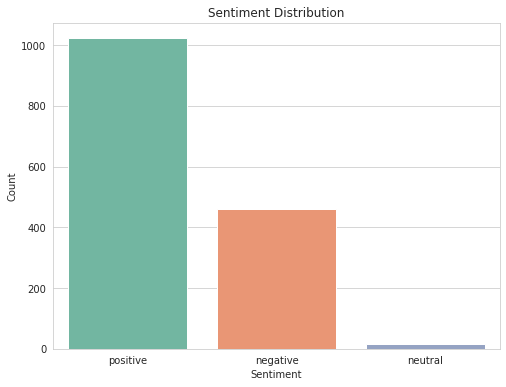

In [21]:
# Create a bar chart of the sentiment distribution
sns.set_style("whitegrid")
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='sentiment', data=df, palette='Set2')
ax.set_title('Sentiment Distribution')
ax.set_xlabel('Sentiment')
ax.set_ylabel('Count')
plt.show()

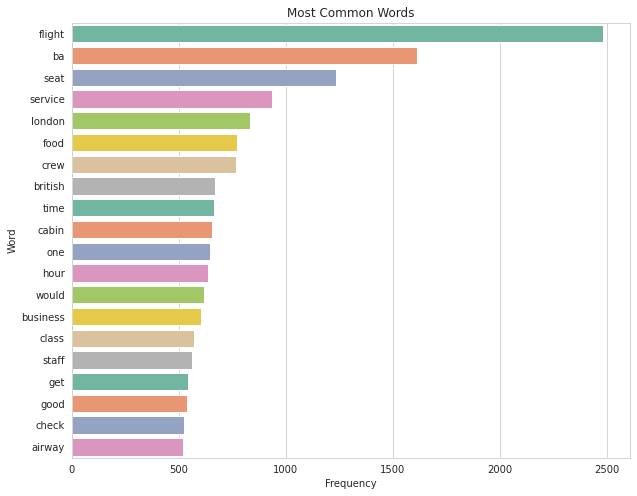

In [22]:
# Count word frequency
word_freq = Counter(" ".join(df['clean_text']).split()).most_common(20)
words = [pair[0] for pair in word_freq]
freqs = [pair[1] for pair in word_freq]

# Create bar chart
plt.figure(figsize=(10, 8))
sns.barplot(x=freqs, y=words, palette='Set2')
plt.title('Most Common Words')
plt.xlabel('Frequency')
plt.ylabel('Word')
plt.show()